## Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Load Training Data

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

# Load Training Data
data_boston = load_boston()
X, y = data_boston['data'], data_boston['target']

# Feature Normalization
X_norm, mu, sigma = utils.feature_normalize(X)

# append a column of ones to matrix X
XX = np.vstack([np.ones((X_norm.shape[0],)),X_norm.T]).T

# split the data into training, validation and test sets
X_tmp, X_test, y_tmp, y_test = train_test_split(XX, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2, random_state=5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training with λ = 0

In [179]:
regressor = RegularizedLinearReg_SquaredLoss()
theta = regressor.train(X_train, y_train, 0.0, 1000)
test_err = regressor.loss(theta, X_test, y_test, 0)
print ('test error with λ = 0: ', test_err)

Optimization terminated successfully.
         Current function value: 10.895407
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
test error with λ = 0:  10.731510797030737


## Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 10.895407
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.895501
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.895690
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.896348
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.898230
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 10.904804
         Iterations: 24
         Function evaluations:

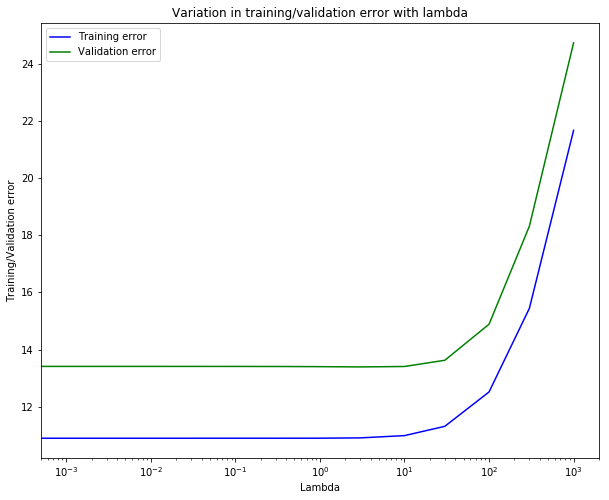

In [180]:
reg_vec, error_train, error_val = utils.validation_curve(X_train,y_train,X_val,y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)

## Test error with the best 𝜆 = 0.001

In [182]:
reg = 0.001
regressor = RegularizedLinearReg_SquaredLoss()
theta = regressor.train(X_train, y_train, reg, 1000)
test_err = regressor.loss(theta, X_test, y_test, 0)
print ("test error with λ = {}: {}".format(reg, test_err))

Optimization terminated successfully.
         Current function value: 10.895501
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
test error with λ = 0.001: 10.731447170952947


# Quadratic Features

## Bias-variance analysis

         Current function value: 3.047823
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.053475
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.064618
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.102019
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.197266
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.444951
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.865110
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 4.610332

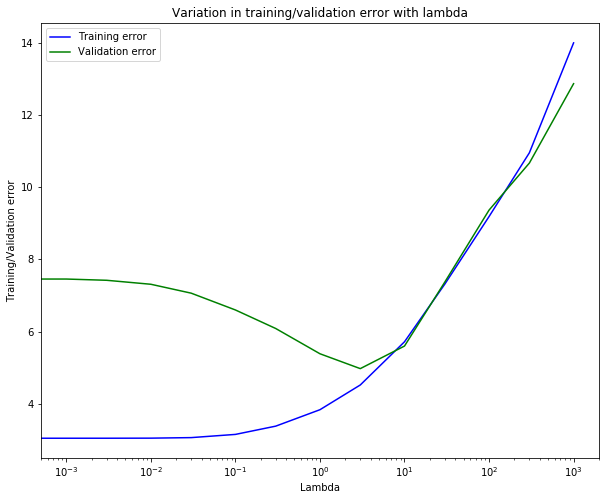

In [115]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
X, y = data_boston['data'], data_boston['target']
X = pf.fit_transform(X)

X_norm, mu, sigma = utils.feature_normalize(X)
XX = np.vstack([np.ones((X_norm.shape[0],)),X_norm.T]).T
X_tmp, X_test, y_tmp, y_test = train_test_split(XX, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2, random_state=5)

reg_vec, error_train, error_val = utils.validation_curve(X_train,y_train,X_val,y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)

## Test error with the best 𝜆 = 3.0

In [116]:
reg = 3.0
regressor = RegularizedLinearReg_SquaredLoss()
theta = regressor.train(X_train, y_train, reg, 1000)
test_err = regressor.loss(theta, X_test, y_test, 0)
print ("test error with λ = {}: {}".format(reg, test_err))

Optimization terminated successfully.
         Current function value: 5.643032
         Iterations: 88
         Function evaluations: 91
         Gradient evaluations: 91
test error with λ = 3.0:  4.611468305431875


# Cubic Features

## bias-variance analysis

         Current function value: 1.188524
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.193587
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.203597
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.237451
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.325264
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.560294
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 1.953157
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 2.567512

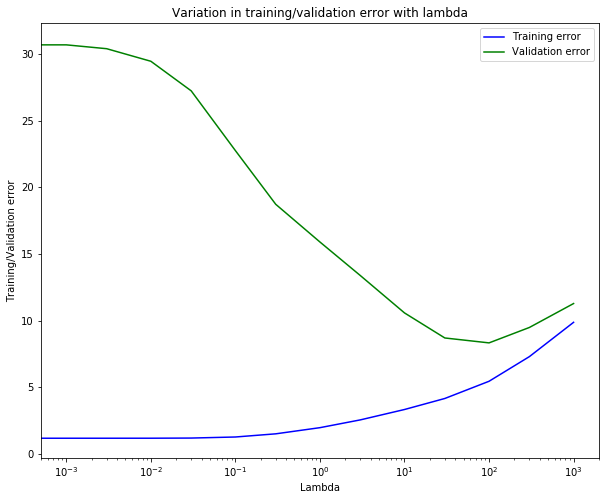

In [135]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)
X, y = data_boston['data'], data_boston['target']
X = pf.fit_transform(X)

X_norm, mu, sigma = utils.feature_normalize(X)
XX = np.vstack([np.ones((X_norm.shape[0],)),X_norm.T]).T
X_tmp, X_test, y_tmp, y_test = train_test_split(XX, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2, random_state=5)

reg_vec, error_train, error_val = utils.validation_curve(X_train,y_train,X_val,y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)

## Test error with the best 𝜆 = 100.0

In [136]:
reg = 100.0
regressor = RegularizedLinearReg_SquaredLoss()
theta = regressor.train(X_train, y_train, reg, 1000)
test_err = regressor.loss(theta, X_test, y_test, 0)
print ("test error with λ = {}: {}".format(reg, test_err))

Optimization terminated successfully.
         Current function value: 7.362923
         Iterations: 34
         Function evaluations: 44
         Gradient evaluations: 44
test error with λ = 100.0: 5.173790235215558


## Summary

1. Linear model: the best test error with λ = 0.001: 10.7314.

    Both the training error and validation error are high, showing high bias for the model. In this case, regularization has little effect in improving model performance.
    
    
2. Quadratic model: the best test error with λ = 3.0 is 4.6114.

    With proper regularization λ = 3.0, quadratic model fits the model well and provides the best result for the test set among the three models.
    
    
3. Cubic model: the best test error with λ = 100.0: 5.1737.

    There is a huge gap between training error and validation error in the lower end of regularization, showing high variance for the model. The best choice of λ is large, which provides strong penalties for complex models.